# In Depth 3 - Drawing DiHypergraphs

Here we show the fuctionalities and parameters of `xgi.draw_bipartite()`.  It is similar to the [networkx](https://networkx.org/documentation/stable/reference/drawing.html) corresponding function (+ some bonus) and heavily relies on [matplotlib](https://matplotlib.org/)'s Collection plotting.

In [1]:
import matplotlib.pyplot as plt

import xgi

Les us first create a small toy hypergraph containing edges of different sizes.

In [2]:
diedges = [({0, 1}, {2}), ({1}, {4}), ({2, 3}, {4, 5})]
DH = xgi.DiHypergraph(diedges)

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29b6a48d0>,
   <matplotlib.patches.FancyArrowPatch at 0x127016d50>]))

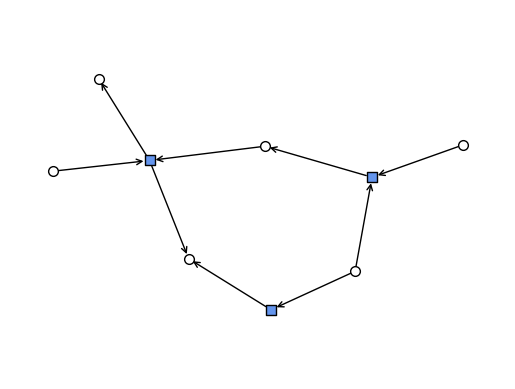

In [3]:
xgi.draw_bipartite(DH)

## Basics

Notice that this function returns a tuple `(ax, collections)` where `collections` is a tuple `(node_collection, edge_node_collection)`. The collections can be used to plot colorbars as we will see later.

The color, linewidth, transparancy, and style of the hyperedges can all be customised, for example with single values:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29ba4dc90>,
   <matplotlib.patches.FancyArrowPatch at 0x29ba4d190>]))

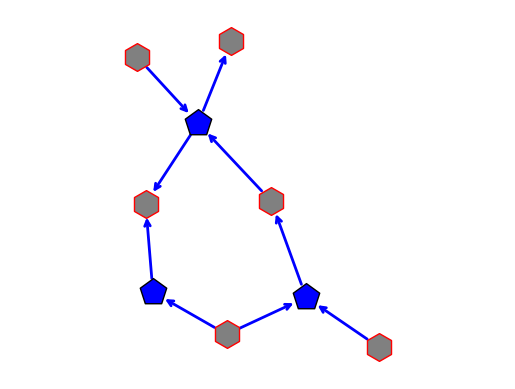

In [4]:
xgi.draw_bipartite(
    DH,
    node_shape="h",
    node_fc="grey",
    node_ec="r",
    node_size=20,
    edge_marker_size=20,
    edge_marker_shape="p",
    dyad_lw=2,
    arrowsize=10,
    edge_marker_fc="b",
    dyad_color="b",
)

Or with multiple values:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29baa5750>,
   <matplotlib.patches.FancyArrowPatch at 0x29b9b1ed0>]))

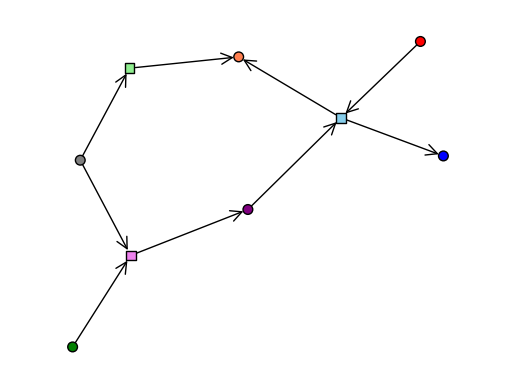

In [5]:
xgi.draw_bipartite(
    DH,
    node_fc=["g", "grey", "purple", "coral", "r", "b"],
    arrowsize=20,
    edge_marker_fc=["violet", "lightgreen", "skyblue"],
    dyad_color="k",
)

Adding node and edge labels:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29b9b1250>,
   <matplotlib.patches.FancyArrowPatch at 0x29ba67fd0>]))

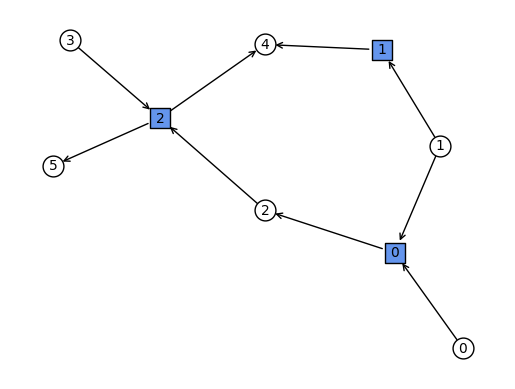

In [6]:
xgi.draw_bipartite(
    DH, node_labels=True, hyperedge_labels=True, node_size=15, edge_marker_size=15
)

## Arrays of floats and colormaps

In XGI, you can easily color hyperedges according to an EdgeStat, or just an array or a dict with float values:

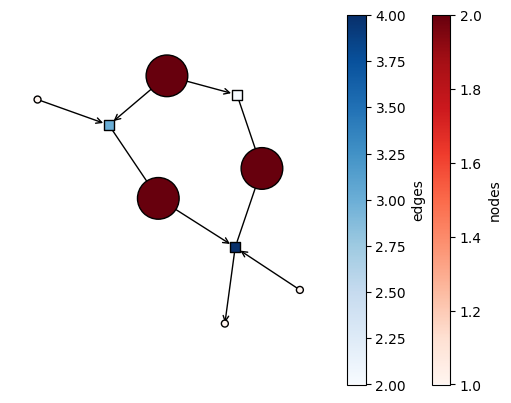

In [7]:
ax, collections = xgi.draw_bipartite(
    DH,
    node_fc=DH.nodes.degree,
    edge_marker_fc=DH.edges.size,
    node_size=DH.nodes.degree,
)

node_coll, edge_marker_coll, dyad_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_marker_coll, label="edges")

By default, the colormaps used are "crest_r" and "Reds". These can be changed:

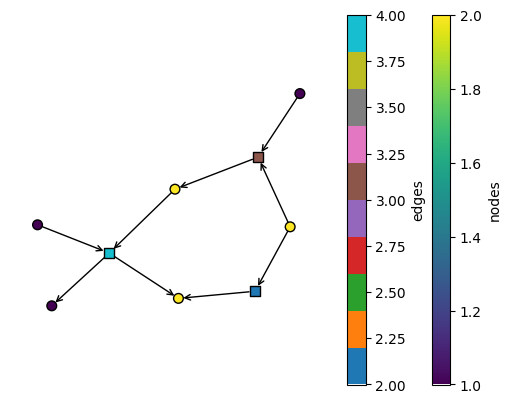

In [8]:
ax, collections = xgi.draw_bipartite(
    DH,
    node_fc=DH.nodes.degree,
    edge_marker_fc=DH.edges.size,
    node_fc_cmap="viridis",
    edge_marker_fc_cmap="tab10",
)

node_coll, edge_marker_coll, dyad_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_marker_coll, label="edges")

## Styling of arrows

By default, the `arrowstyle` used is `"-|>"`:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29bc72150>,
   <matplotlib.patches.FancyArrowPatch at 0x29bb36190>]))

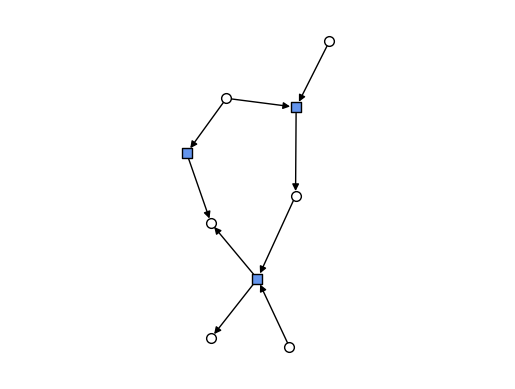

In [9]:
xgi.draw_bipartite(DH, arrowstyle="-|>")

Other styles can be used, see the full list from [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch)

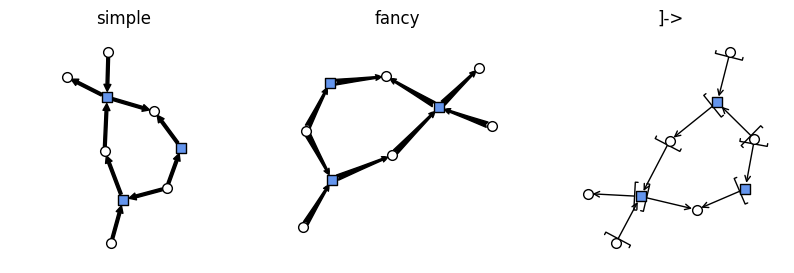

In [10]:
styles = ["simple", "fancy", "]->"]

fig, axs = plt.subplots(1, len(styles), figsize=(10, 3))

for i, style in enumerate(styles):
    ax = axs[i]
    xgi.draw_bipartite(DH, arrowstyle=style, ax=ax)
    ax.set_title(f"{style}")

There is a second argument to style arrows: `connectionstyle`. The default value is `"arc3"`, but other values can be used

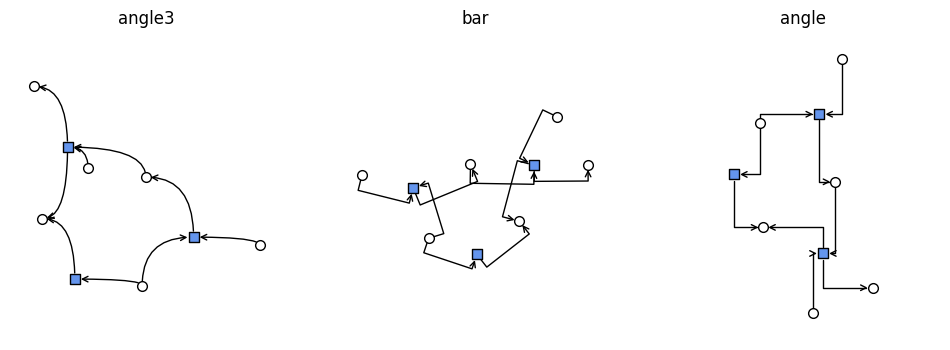

In [11]:
styles = ["angle3", "bar", "angle"]

fig, axs = plt.subplots(1, len(styles), figsize=(12, 4))

for i, style in enumerate(styles):
    ax = axs[i]
    xgi.draw_bipartite(DH, connectionstyle=style, ax=ax)
    ax.set_title(f"{style}")

## Layout

The initial layout is computed based on the bipartite network representation of the hypergraph:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29be2bc50>,
   <matplotlib.patches.FancyArrowPatch at 0x29bdf8e10>]))

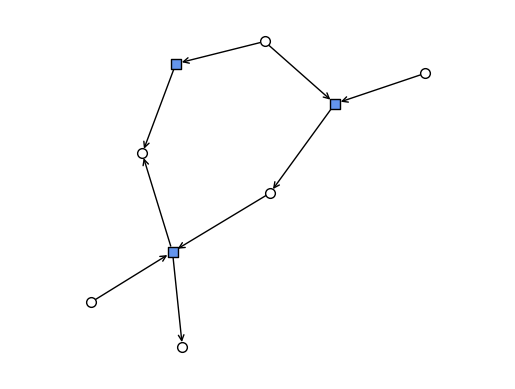

In [12]:
pos = xgi.bipartite_spring_layout(DH)
xgi.draw_bipartite(DH, pos=pos)

A larger example

In [13]:
edges = [
    [[8], [0]],
    [[1, 2], [0]],
    [[0, 3], [1]],
    [[1, 3], [2]],
    [[1, 5], [3]],
    [[2, 5], [4]],
    [[3, 4], [5, 6]],
    [[6, 7], [5]],
    [[5, 8], [6]],
    [[6, 8], [7]],
    [[6, 0], [8]],
    [[7, 0], [9]],
]

DH = xgi.DiHypergraph(edges)

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x29bdc6510>,
   <matplotlib.patches.FancyArrowPatch at 0x29be7c4d0>]))

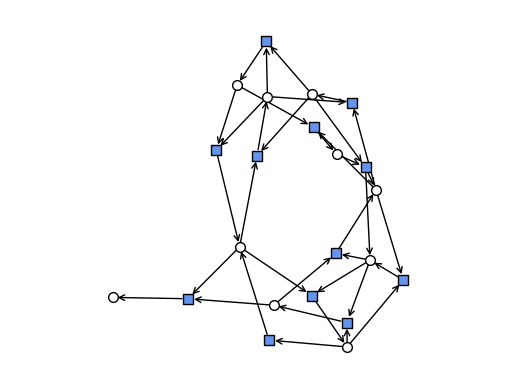

In [14]:
pos = xgi.bipartite_spring_layout(DH)
xgi.draw_bipartite(DH, pos=pos)